In [6]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [7]:
path = r"D:\NEU\Năm 3\DATA PREP\PROJECT_DATAPREP\GITHUB REPO\dataset\dseb63_final_project_DP_dataset\\"
previous_application = pd.read_csv(path + 'dseb63_previous_application.csv')

In [8]:
previous_application.head(10)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587
5,2068863,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11,Y,...,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,91587
6,2551979,Consumer loans,6664.275,71352.0,71352.0,0.0,71352.0,WEDNESDAY,9,Y,...,12.0,low_normal,POS industry with interest,365243.0,-1176.0,-846.0,-846.0,-840.0,0.0,91587
7,2517198,Revolving loans,11250.000,0.0,225000.0,NaN,NaN,TUESDAY,13,Y,...,0.0,XNA,Card X-Sell,-713.0,-673.0,365243.0,-461.0,-61.0,0.0,91587
8,1760610,Consumer loans,8593.965,33052.5,33052.5,0.0,33052.5,SUNDAY,10,Y,...,4.0,low_action,POS industry with interest,365243.0,-783.0,-693.0,-753.0,-748.0,0.0,91587
9,2523466,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,256489


In [9]:
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [10]:
previous_application.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

**Check null percentage of previous application**

In [11]:
def check_missing_values(df):
    # Missing value percentage 
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Null Percentage"]
    return df_null_percentage



null_df = check_missing_values(previous_application)
null_df

,Feature,Null Percentage
0,RATE_INTEREST_PRIMARY,99.661102
1,RATE_INTEREST_PRIVILEGED,99.661102
2,AMT_DOWN_PAYMENT,53.019698
3,RATE_DOWN_PAYMENT,53.019698
4,NAME_TYPE_SUITE,49.138538
5,DAYS_FIRST_DRAWING,39.690571
6,DAYS_FIRST_DUE,39.690571
7,DAYS_LAST_DUE_1ST_VERSION,39.690571
8,DAYS_LAST_DUE,39.690571
9,DAYS_TERMINATION,39.690571


<AxesSubplot:xlabel='Null Percentage', ylabel='Feature'>

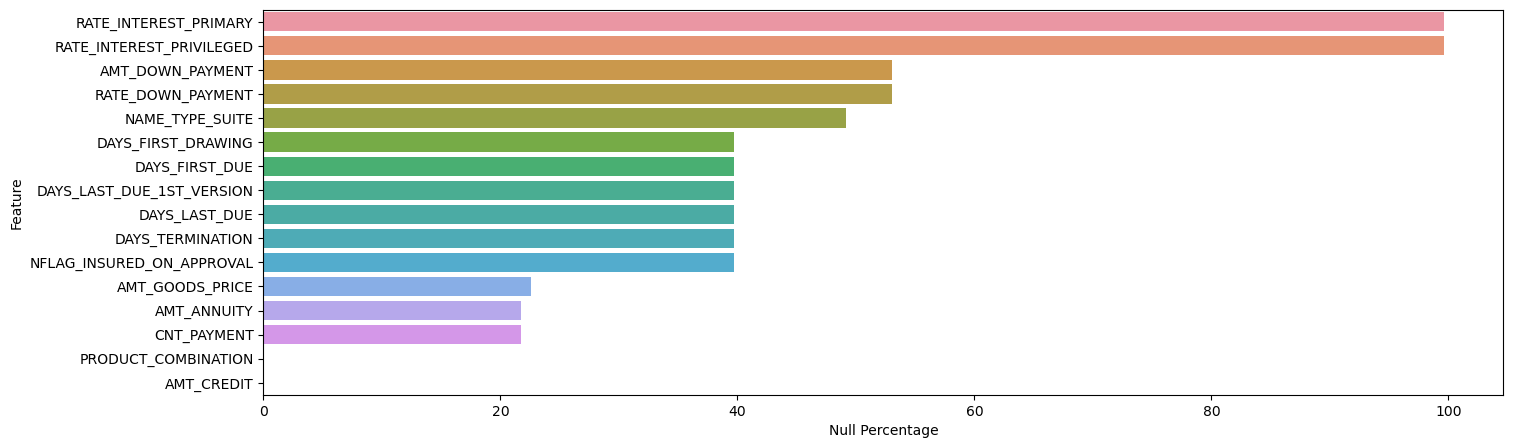

In [12]:
plt.figure(figsize=(16, 5))
sns.barplot(x=null_df["Null Percentage"], y=null_df["Feature"])

- Bảng previous_application có 16/ 37 columns chứa null

- columns **RATE_INTEREST_PRIMARY** và **RATE_INTEREST_PRIVILEGED** chứa đến 99% missing values --> nên drop 2 features này

- Ngoài ra đối với PRODUCT_COMBINATION và AMT_CREDIT phần trăm missing_value chỉ chiếm một lượng rất nhỏ nên ta có thể drop các rows bị null của 2 cột này. 

In [13]:
previous_application = previous_application.drop(columns=["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"])

In [14]:
previous_application["AMT_CREDIT"].fillna(0, inplace=True)
previous_application['PRODUCT_COMBINATION'].fillna(previous_application['PRODUCT_COMBINATION'].mode()[0],inplace=True)

### Merging previous application with Target feature of application_train

In [15]:
application_train = pd.read_csv(path + 'dseb63_application_train.csv')

In [16]:
print("-"*100)
print("Merging TARGET with previous_application Table")

previous_application_merge = application_train[['SK_ID_CURR','TARGET']].merge(previous_application,on='SK_ID_CURR',how='left')
previous_application_merge.head()

----------------------------------------------------------------------------------------------------
Merging TARGET with previous_application Table


,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


### Check Correlation of Numeric Features

In [17]:
numeric_cols = previous_application_merge._get_numeric_data()
numeric_cols = [col for col in numeric_cols if col not in ['SK_ID_CURR', 'SK_ID_PREV', 'NFLAG_INSURED_ON_APPROVAL']]
numeric_cols


['TARGET',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [18]:
numeric_df = previous_application_merge[numeric_cols]
numeric_corr_df = numeric_df.corr()
numeric_corr_df

,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
TARGET,1.000000,-0.015795,-0.006511,-0.003226,-0.016336,-0.000825,-0.025866,-0.003340,-0.025337,0.038339,-0.002416,0.029390,-0.032117,-0.007245,0.018618,0.017144,0.016753
AMT_ANNUITY,-0.015795,1.000000,0.810080,0.818096,0.262493,0.822280,-0.037716,0.019783,-0.104563,0.286121,-0.014299,0.398348,0.052592,-0.050500,-0.066981,0.091946,0.076662
AMT_APPLICATION,-0.006511,0.810080,1.000000,0.975592,0.481206,0.999869,-0.015606,0.004705,-0.073061,0.140842,-0.007586,0.682893,0.078843,-0.048539,-0.088073,0.182356,0.157657
AMT_CREDIT,-0.003226,0.818096,0.975592,1.000000,0.292692,0.993086,-0.022049,-0.025916,-0.190747,0.141308,-0.009374,0.675537,-0.035645,0.003322,0.043562,0.235387,0.224487
AMT_DOWN_PAYMENT,-0.016336,0.262493,0.481206,0.292692,1.000000,0.481206,0.016403,0.001801,0.466047,-0.023419,0.003520,0.031706,-0.000327,-0.012180,-0.001893,-0.031291,-0.030689
AMT_GOODS_PRICE,-0.000825,0.822280,0.999869,0.993086,0.481206,1.000000,-0.045518,-0.018437,-0.073061,0.295433,-0.014968,0.674370,-0.022540,-0.020209,0.016094,0.222506,0.220226
HOUR_APPR_PROCESS_START,-0.025866,-0.037716,-0.015606,-0.022049,0.016403,-0.045518,1.000000,0.005162,0.027135,-0.040391,0.014739,-0.055192,0.013660,-0.002421,-0.015668,-0.017858,-0.018248
NFLAG_LAST_APPL_IN_DAY,-0.003340,0.019783,0.004705,-0.025916,0.001801,-0.018437,0.005162,1.000000,0.004580,0.016963,0.000777,0.063461,-0.000066,-0.001597,-0.001967,-0.003160,-0.001434
RATE_DOWN_PAYMENT,-0.025337,-0.104563,-0.073061,-0.190747,0.466047,-0.073061,0.027135,0.004580,1.000000,-0.209805,-0.006361,-0.281318,-0.004937,-0.037686,-0.013257,-0.149079,-0.146918
DAYS_DECISION,0.038339,0.286121,0.140842,0.141308,-0.023419,0.295433,-0.040391,0.016963,-0.209805,1.000000,-0.016808,0.253670,-0.004811,0.178560,0.082549,0.449779,0.399678


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_26836\944348423.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_corr_df, dtype=np.bool)


Text(0.5, 1.0, 'Correlation of Numeric Features')

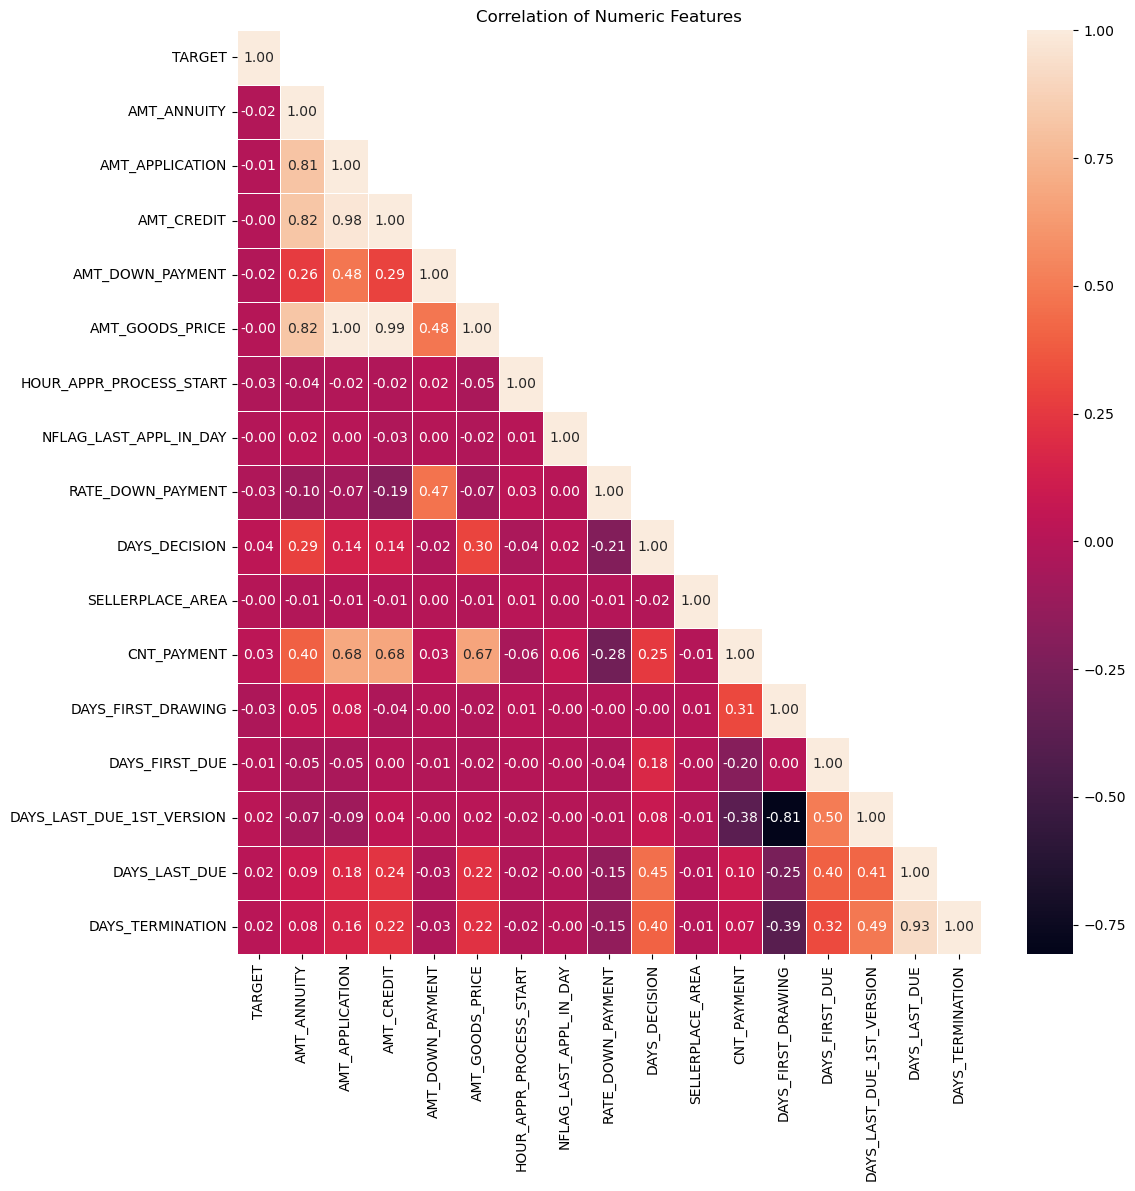

In [19]:
mask = np.zeros_like(numeric_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

plt.figure(figsize=(12,12))
sns.heatmap(numeric_corr_df,mask=mask,annot=True,fmt=".2f",linewidth=0.5)
plt.title('Correlation of Numeric Features')

**Một số cặp feature có tương sự tương quan rất cao : **

- "DAYS_LAST_DUE" và "DAYS_TERMINATION" (0.928)

- "DAYS_FIRST_DRAWING" and "DAYS_LAST_DUE_1ST_VERSION" (0.808)

- "AMT_ANNUTY", "AMT_APPLICATION", "AMT_CREDIT" and "AMT_GOODS_PRICE" are highly corrlelated

- Ta nên loại bỏ "DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION", "AMT_APPLICATION", "AMT_CREDIT" và "AMT_GOODS_PRICE" để tránh trường hợp mô hình xảy ra đa cộng tuyến.

**--> Giữ lại DAY_LAST_DUE, DAY_FIRST_DRAWING, và AMT_ANNUTY để build model**

In [20]:
print("-" * 100)
print("Numeric Columns with highest values of correlation with Target Variable are:")

top_corr_target_df = numeric_corr_df.iloc[1:,0].sort_values(ascending=False)
top_corr_target_df

----------------------------------------------------------------------------------------------------
Numeric Columns with highest values of correlation with Target Variable are:


DAYS_DECISION                0.038339
CNT_PAYMENT                  0.029390
DAYS_LAST_DUE_1ST_VERSION    0.018618
DAYS_LAST_DUE                0.017144
DAYS_TERMINATION             0.016753
AMT_GOODS_PRICE             -0.000825
SELLERPLACE_AREA            -0.002416
AMT_CREDIT                  -0.003226
NFLAG_LAST_APPL_IN_DAY      -0.003340
AMT_APPLICATION             -0.006511
DAYS_FIRST_DUE              -0.007245
AMT_ANNUITY                 -0.015795
AMT_DOWN_PAYMENT            -0.016336
RATE_DOWN_PAYMENT           -0.025337
HOUR_APPR_PROCESS_START     -0.025866
DAYS_FIRST_DRAWING          -0.032117
Name: TARGET, dtype: float64

Có thể thấy rằng correlation của Target với các numeric features rất thấp. Điều này chỉ ra rằng không có nhiều mối quan hệ tuyến tính trực tiếp giữa Target và các features.

**Categorical Features**

In [35]:
def categorical_feature_explore(column_name, data, rotation=0):

    unique_categories_count = data[column_name].value_counts()
    data_values = unique_categories_count.values

    print('-' * 100)
    print(f'The unique categories of {column_name} are:')
    print(unique_categories_count)
    print('-' * 100)
    print(
        f'Total Number of unique categories of {column_name} = {len(unique_categories_count)}')

    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    sns.set(style='whitegrid', font_scale=1.2)

    sns.barplot(ax=axes[0], x=unique_categories_count.index,
                y=unique_categories_count.values, palette='Set1')
    axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=rotation)
    axes[0].set_title(f'Distribution of {column_name}')
    for p in axes[0].patches:
        x, y = p.get_xy()
        height, width = p.get_height(), p.get_width()

        axes[0].annotate(xy=(x + width/3, y + height+100),
                         text=f"{height * 100/sum(data_values) : .2f}%", size=12)


    palette = "#2B1125"

    percentage_defaulter_per_category = data[data.TARGET == 1][column_name].value_counts(
    ) * 100 / data[column_name].value_counts()
    percentage_defaulter_per_category.dropna(inplace=True)
    percentage_defaulter_per_category = percentage_defaulter_per_category.round(
        2)

    axes[1] = sns.barplot(ax=axes[1], x=percentage_defaulter_per_category.index,
                          y=percentage_defaulter_per_category.values)

    axes[1].set_title(
        f'Percentage Defaulters in each category of {column_name}')
    axes[1].set_yticklabels(
        [str(label) + '%' for label in axes[1].get_yticks()])
    plt.xticks(axes= axes[1], rotation=rotation)
    plt.show()
    print('-' * 100)

**Name Contract Status vs Target**

----------------------------------------------------------------------------------------------------
The unique categories of NAME_CONTRACT_STATUS are:
Approved        708850
Canceled        207652
Refused         196126
Unused offer     18263
Name: NAME_CONTRACT_STATUS, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_STATUS = 4


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_26836\958952099.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(


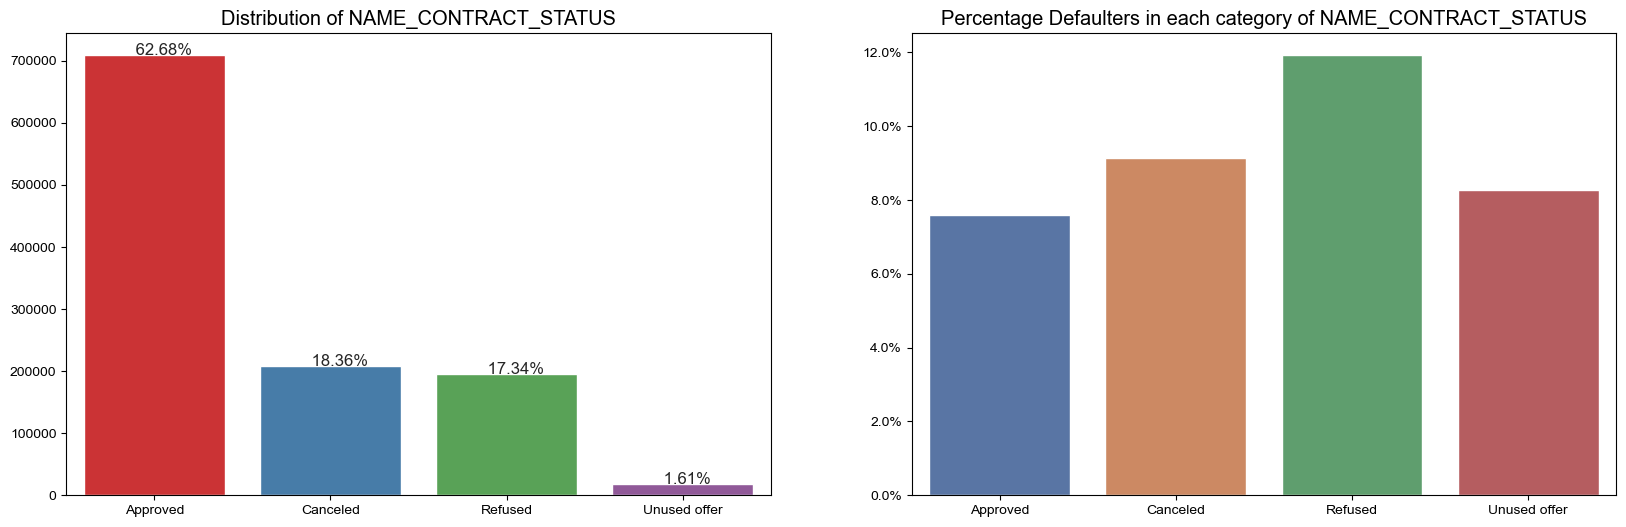

----------------------------------------------------------------------------------------------------


In [22]:
categorical_feature_explore(column_name='NAME_CONTRACT_STATUS', data=previous_application_merge)

- **Contract được Approved chiếm số lượng lớn (~ 63%) nhưng những khoản vay được approved lại có tỉ lệ vỡ nợ thấp nhất (dưới 8%)**

- Các contract bị refused có tỉ lệ vỡ nợ cao nhất với gần 12%

**Code Reject Reason vs Target**


----------------------------------------------------------------------------------------------------
The unique categories of CODE_REJECT_REASON are:
XAP       916498
HC        116812
LIMIT      38037
SCO        26096
CLIENT     18263
SCOFR       8697
XNA         3521
VERIF       2452
SYSTEM       515
Name: CODE_REJECT_REASON, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CODE_REJECT_REASON = 9


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_26836\958952099.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(


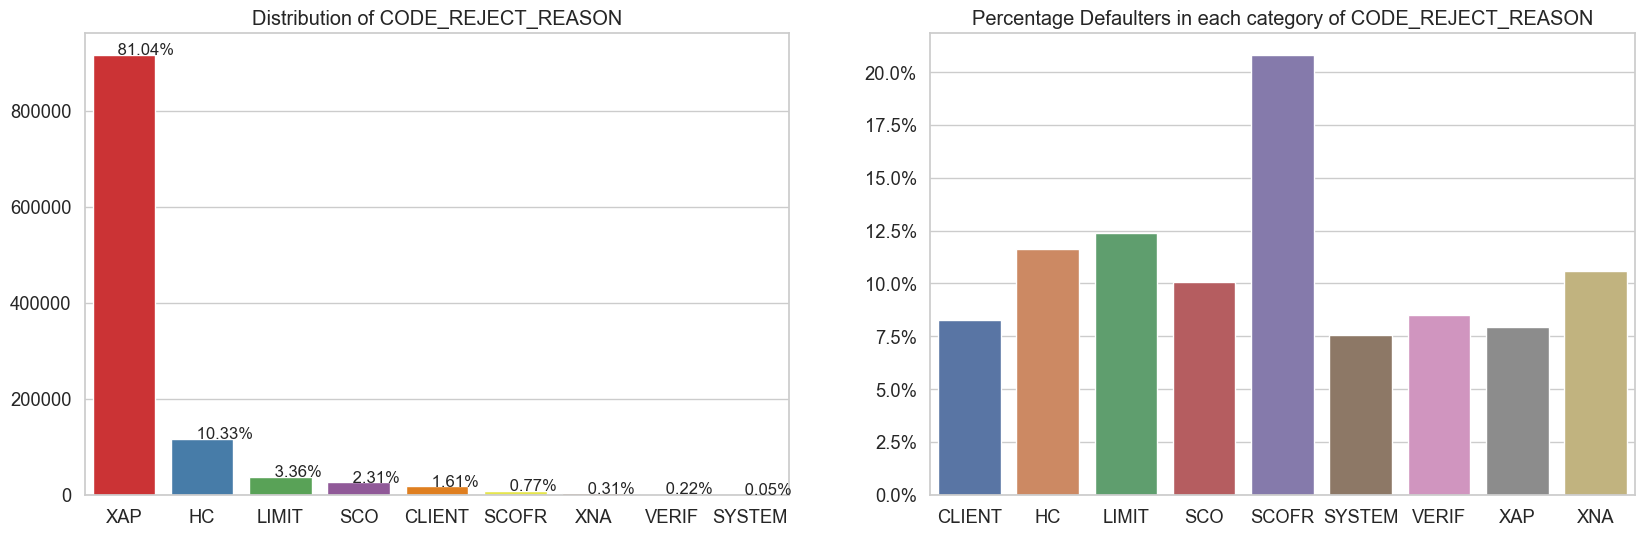

----------------------------------------------------------------------------------------------------


In [23]:
categorical_feature_explore(column_name='CODE_REJECT_REASON', data=previous_application_merge)

**Channel Type vs Target**

----------------------------------------------------------------------------------------------------
The unique categories of CHANNEL_TYPE are:
Credit and cash offices       480984
Country-wide                  338471
Stone                         146793
Regional / Local               73674
Contact center                 46893
AP+ (Cash loan)                39561
Channel of corporate sales      4202
Car dealer                       313
Name: CHANNEL_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CHANNEL_TYPE = 8


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_26836\1608227272.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(


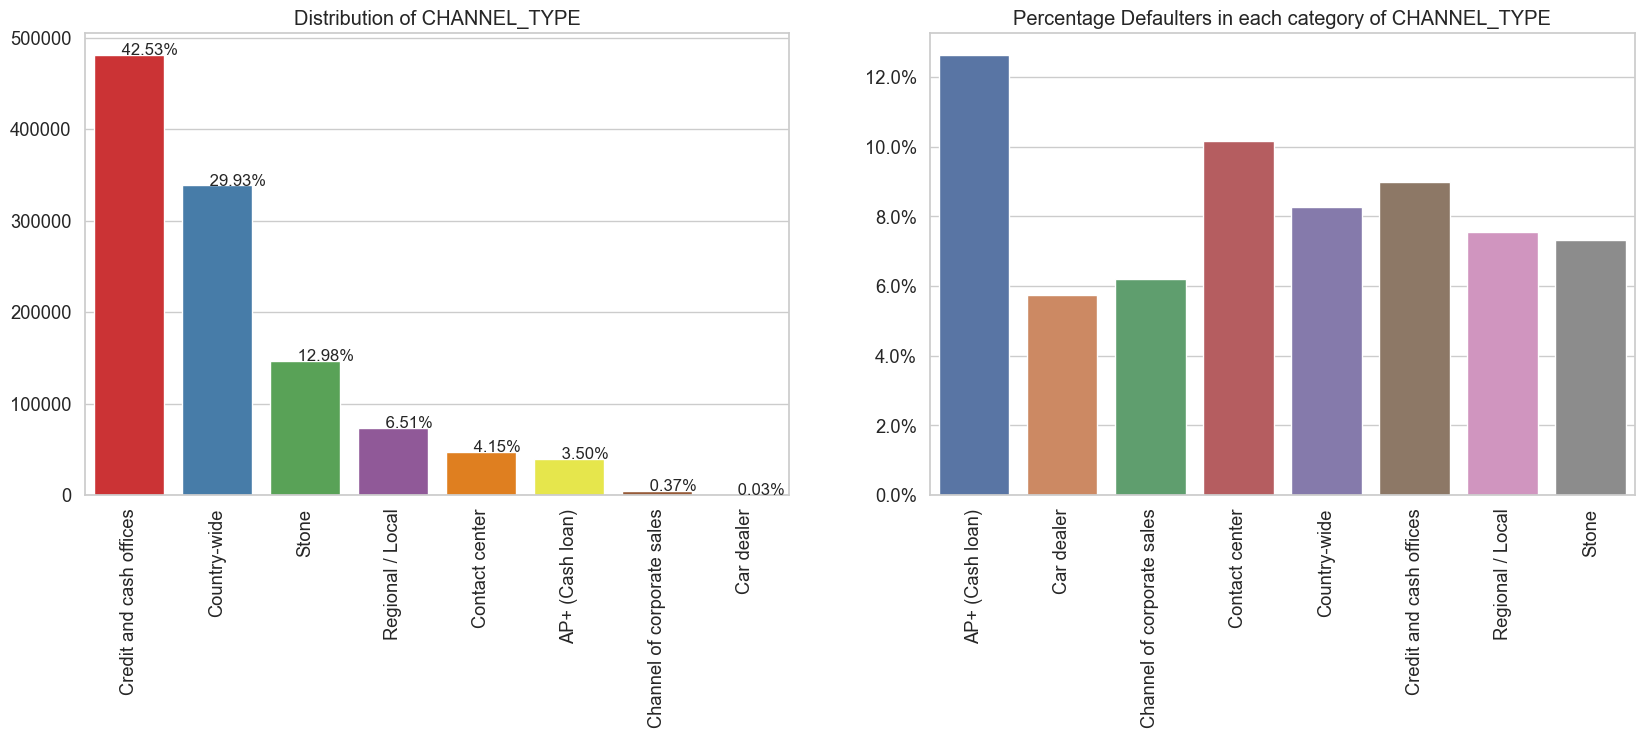

----------------------------------------------------------------------------------------------------


In [36]:
categorical_feature_explore(column_name='CHANNEL_TYPE', data=previous_application_merge, rotation=90)

**Product Combination vs Target**

----------------------------------------------------------------------------------------------------
The unique categories of PRODUCT_COMBINATION are:
Cash                              188499
POS household with interest       181002
POS mobile with interest          152876
Cash X-Sell: middle                96455
Cash X-Sell: low                   88705
Card Street                        75520
POS industry with interest         66744
POS household without interest     57027
Card X-Sell                        53322
Cash Street: high                  41356
Cash X-Sell: high                  40544
Cash Street: middle                23976
Cash Street: low                   22728
POS other with interest            16187
POS mobile without interest        15880
POS industry without interest       8401
POS others without interest         1669
Name: PRODUCT_COMBINATION, dtype: int64
----------------------------------------------------------------------------------------------------
Total Numbe

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_26836\1608227272.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(


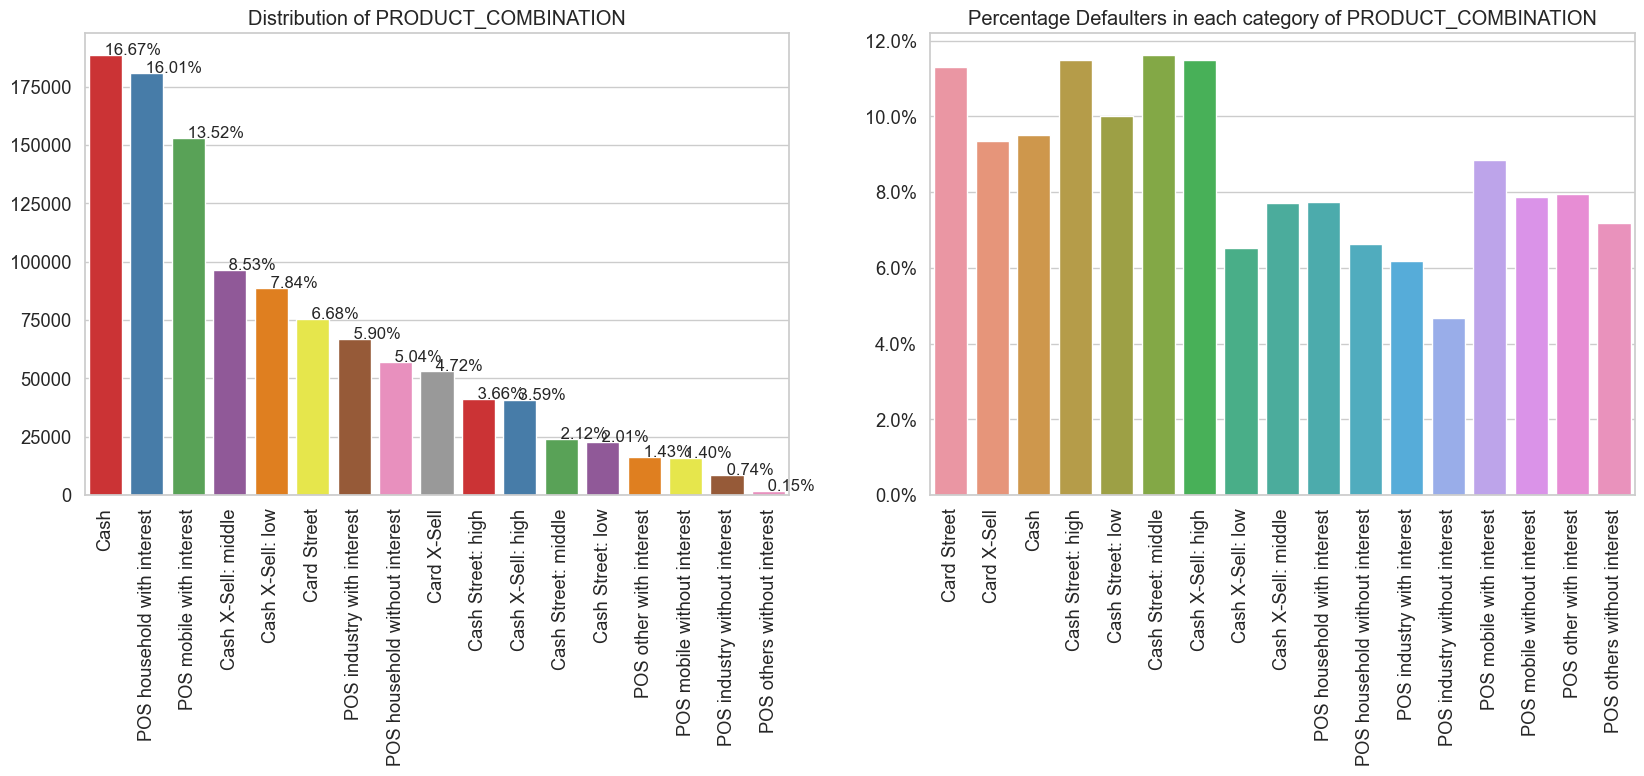

----------------------------------------------------------------------------------------------------


In [39]:
categorical_feature_explore(column_name='PRODUCT_COMBINATION',data=previous_application_merge,rotation=90)

- The 3 most common types of Product Combination are Cash, POS household with interest and POS mobile with interest. They correspond to roughly 50% of all the applications.

- Looking at the Percentage of Defaulters per category plot, we see a highest defaulting tendency among Cash Street: mobile category, Cash X-sell: high, Cash Street: high and Card Street which all are near about 11-11.5% defaulters per category. The lowest Percentage of Defaulters are in the POS Industry without interest Category, which correspond to about 4.5% Defaulter

**Plotting Continuous Variables**

In [26]:
sys.path.insert(0,r"D:\NEU\Năm 3\DATA PREP\PROJECT_DATAPREP\GITHUB REPO\Group-11_Project_Credit_Default_Risk\eda\eda_utils.py")

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


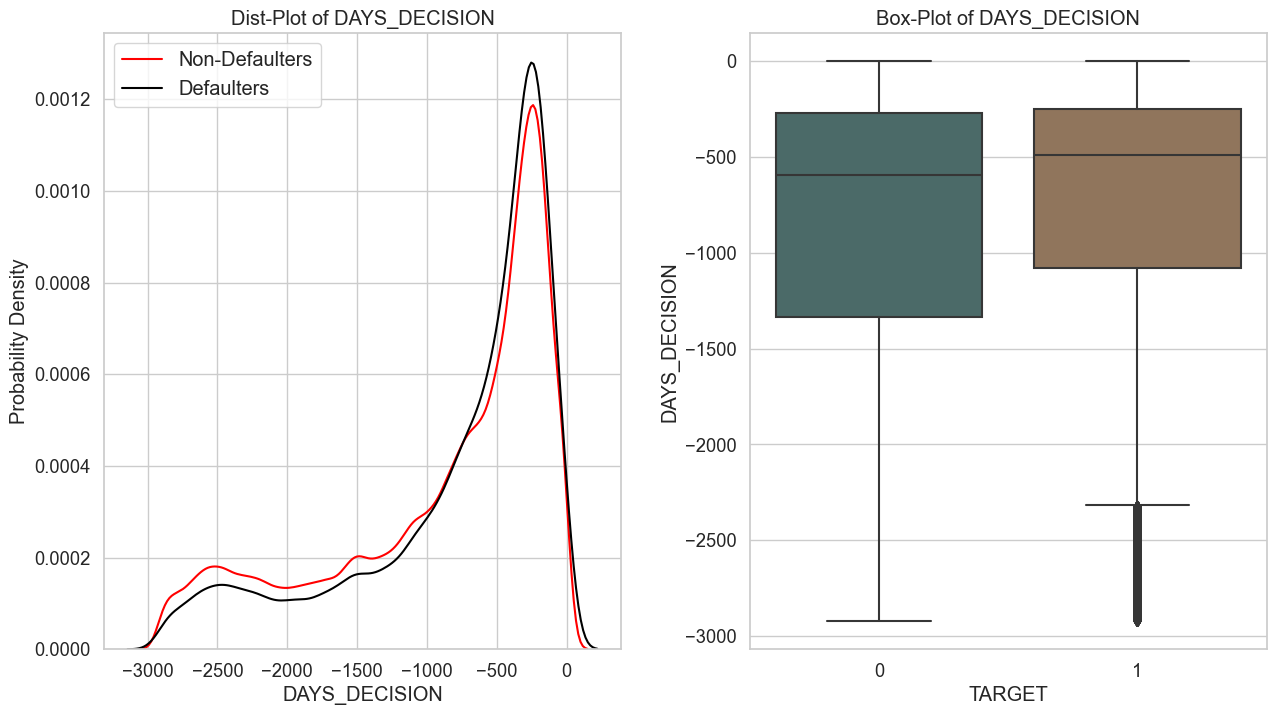

In [ ]:
from utils import explore_data as explore
explore.plot_continuous_variables(previous_application_merge, 'DAYS_DECISION', plots=[
                                  'distplot', 'box'], figsize=(15, 8))